In [14]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('chromedriver.exe')

In [3]:
import time
driver.get('http://www.instargram.com')
time.sleep(2)

In [4]:
def insta_searching(word):
    url = 'http://www.instagram.com/explore/tags/' + word
    return url

In [28]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [29]:
def select_first(dirver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=90.0.4430.212)


In [12]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    
    # 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content = ' '
        
    # 본문 내용에서 해시태크 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+',content)
    
    # 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
    
    # 위치정보 가져오기
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC',place)
    except:
        place = ' '
        
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['#목스키친제주 바다 보며 먹는 인생 리조또 맛집🧡푸짐~한 해산물 들어가는건 기본!특히 여기 리조또 매콤깔끔한 맛에 중독될걸👀제주 맛집하면 오션뷰는 필수 덕목이지🌊제주향기 그득한 인테리어에쫀맛탱 리조또, 필라프에 라면까지😍까탈스러운 친구도 먹방찍게 할 리얼맛집❤️@꾸덕 리조또랑 해물라면 맛집 요기요기🙋\u200d♀️.주소 : 제주 서귀포시 표선면 일주동로6455번길 21.#제주핫플 #제주도핫플 #제주핫플레이스 #제주도핫플레이스 #제주여행 #제주도여행 #제주도여행코스 #제주맛집 #제주도맛집 #제주맛집추천 #표선맛집 #서귀포맛집 #서귀포여행 #표선여행',
 '2021-05-28',
 0,
 '',
 ['#목스키친제주',
  '#제주핫플',
  '#제주도핫플',
  '#제주핫플레이스',
  '#제주도핫플레이스',
  '#제주여행',
  '#제주도여행',
  '#제주도여행코스',
  '#제주맛집',
  '#제주도맛집',
  '#제주맛집추천',
  '#표선맛집',
  '#서귀포맛집',
  '#서귀포여행',
  '#표선여행']]

In [17]:
def move_next(dirver):
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
move_next(driver)

In [ ]:
# 여러게시글 수집
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# ① 크롬 브라우저 열기
driver = webdriver.Chrome('chromedriver.exe') 

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('https://www.instargram.com')
time.sleep(2)

email = '인스타계정입력해주세요' 
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타비번입력해주세요'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [20]:
word = input('검색어를 입력하시오 :')

검색어를 입력하시오 :제주도맛집


In [27]:
# 인스타그램 검색페이지 URL 만들기
word = input('검색어를 입력하시오 :')
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

검색어를 입력하시오 :제주관광


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=90.0.4430.212)


In [19]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('1_crawling_jejudoMatJip.xlsx',index = False)

In [22]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('1_crawling_jejuMatJip.xlsx',index = False)

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('1_crawling_jejuYeohang.xlsx',index = False)

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('1_crawling_jejuGwanGwang.xlsx',index = False)

In [31]:
jeju_insta_df = pd.DataFrame( [ ] )

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejuMatJip.xlsx']
for fname in f_list:
    fpath = fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']

In [ ]:
# 예제 5-12 여러 개의 저장파일 통합하기
jeju_insta_df = pd.DataFrame( [ ] )

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']

In [32]:
# 예제 5-13 중복 데이터 제거하고 저장하기
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
jeju_insta_df.to_excel('1_crawling_raw.xlsx', index = False)

### 워드클라우드

In [47]:
import pandas as pd
raw_total = pd.read_excel('1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#목스키친제주', '#제주핫플', '#제주도핫플', '#제주핫플레이스', '#제...
1    ['#제주도룸싸롱', '#제주도여행', '#제주도맛집', '#제주도룸', '#제주도...
2                                 ['#출근하기싫다', '#일요일끝']
Name: tags, dtype: object

In [48]:
tags_total = [ ]

In [36]:
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [38]:
from collections import Counter
tag_counts = Counter(tags_total)

In [39]:
tag_counts.most_common(50)

[('#제주맛집', 39),
 ('#제주도맛집', 39),
 ('#제주여행', 17),
 ('#제주도', 17),
 ('#애월맛집', 16),
 ('', 15),
 ('#제주도여행', 14),
 ('#서귀포맛집', 12),
 ('#제주맛집추천', 11),
 ('#한림맛집', 9),
 ('#협재맛집', 9),
 ('#제주도카페', 9),
 ('#부산맛집', 8),
 ('#제주핫플', 7),
 ('#제주공항근처맛집', 7),
 ('#제주애월맛집', 7),
 ('#애월카페', 7),
 ('#성산일출봉맛집', 7),
 ('#제주', 6),
 ('#제주도민맛집', 6),
 ('#제주도갈만한곳', 6),
 ('#제주카페', 5),
 ('#제주살이', 5),
 ('#일상', 5),
 ('#jeju', 5),
 ('#제주공항맛집', 5),
 ('#제주갈치조림', 5),
 ('#센텀시티맛집', 5),
 ('#마린시티맛집', 5),
 ('#제주도카페투어', 5),
 ('#제주성산맛집', 5),
 ('#제주가볼만한곳', 4),
 ('#협재해수욕장', 4),
 ('#월정리맛집', 4),
 ('#먹스타그램', 4),
 ('#제주시맛집', 4),
 ('#중문맛집', 4),
 ('#애월점심추천', 4),
 ('#애월밥집', 4),
 ('#금능맛집', 4),
 ('#성산카페', 4),
 ('#함덕맛집', 4),
 ('#을왕리맛집', 4),
 ('#을왕리카페', 4),
 ('#대부도카페', 4),
 ('#대부도맛집', 4),
 ('#부산카페', 4),
 ('#제주도핫플', 3),
 ('#흑돼지', 3),
 ('#협재해변', 3)]

In [40]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 39),
 ('#제주도맛집', 39),
 ('#제주여행', 17),
 ('#애월맛집', 16),
 ('', 15),
 ('#제주도여행', 14),
 ('#서귀포맛집', 12),
 ('#제주맛집추천', 11),
 ('#한림맛집', 9),
 ('#협재맛집', 9),
 ('#제주도카페', 9),
 ('#부산맛집', 8),
 ('#제주핫플', 7),
 ('#제주공항근처맛집', 7),
 ('#제주애월맛집', 7),
 ('#애월카페', 7),
 ('#성산일출봉맛집', 7),
 ('#제주', 6),
 ('#제주도민맛집', 6),
 ('#제주도갈만한곳', 6),
 ('#제주카페', 5),
 ('#제주살이', 5),
 ('#제주공항맛집', 5),
 ('#제주갈치조림', 5),
 ('#센텀시티맛집', 5),
 ('#마린시티맛집', 5),
 ('#제주도카페투어', 5),
 ('#제주성산맛집', 5),
 ('#제주가볼만한곳', 4),
 ('#협재해수욕장', 4),
 ('#월정리맛집', 4),
 ('#먹스타그램', 4),
 ('#제주시맛집', 4),
 ('#중문맛집', 4),
 ('#애월점심추천', 4),
 ('#애월밥집', 4),
 ('#금능맛집', 4),
 ('#성산카페', 4),
 ('#함덕맛집', 4),
 ('#을왕리맛집', 4),
 ('#을왕리카페', 4),
 ('#대부도카페', 4),
 ('#대부도맛집', 4),
 ('#부산카페', 4),
 ('#제주도핫플', 3),
 ('#흑돼지', 3),
 ('#협재해변', 3),
 ('#성산맛집', 3),
 ('#제주혼밥', 3),
 ('#맛집', 3)]

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

In [42]:
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [44]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns= ['tags','counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

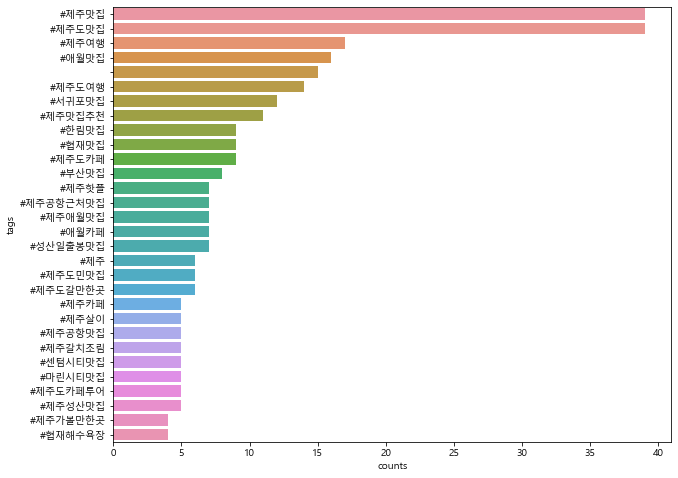

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'counts',y = 'tags',data= tag_counts_df)

In [51]:
pip install WordCloud

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [57]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

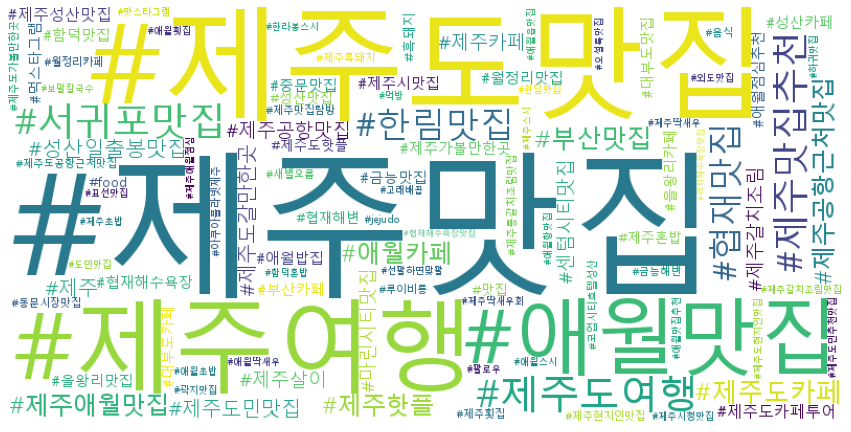

In [58]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('2_tag-wordcloud.png')

### 지도 시각화

In [60]:
import pandas as pd
raw_total = pd.read_excel('1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,#목스키친제주 바다 보며 먹는 인생 리조또 맛집🧡푸짐~한 해산물 들어가는건 기본!특...,2021-05-28,0.0,NaN,"['#목스키친제주', '#제주핫플', '#제주도핫플', '#제주핫플레이스', '#제..."
1,내공주랑❤2박3일 육지여행ㄲ내일부터 정상영업 합니다!.제주도 모든 술자리문의는예림실...,2021-05-30,0.0,NaN,"['#제주도룸싸롱', '#제주도여행', '#제주도맛집', '#제주도룸', '#제주도..."
2,아 제주도 아아아 산방산 아아아아 원앤온리 아아아아아아아 아아아아아아아아#출근하기싫...,2021-05-30,0.0,One and only - 원앤온리 제주,"['#출근하기싫다', '#일요일끝']"
3,어제 스튜가 일찍 소진되어 못 드시고 돌아가신 분들이 많아서오늘 넉넉히 준비했어요😁...,2021-05-31,0.0,월정리해변,"['#흑돼지', '#안녕하샌']"
4,사람 사는 곳 다 똑같은데아침 일찍 일어나서 출근하고땀 범벅인채로 퇴근했는데나는 왜...,2021-05-30,0.0,GROOV JEJU,"['#그루브제주', '#협재해수욕장', '#협재해변', '#협재일몰']"


In [62]:
location_counts = raw_total['place'].value_counts( )
location_counts

Jeju-do                   3
제주도 애월읍                   3
월정리해변                     2
Jeju                      2
사계 해변                     2
애월해안도로                    2
제주맛집                      1
애월해안가                     1
마이피기팬트리                   1
우진해장국                     1
제주 협재 해수욕장                1
코코분식                      1
전학생                       1
서귀포시 동홍동                  1
성수미술관 제주특별점               1
제주도 Jeju Island           1
성산보말죽칼국수 성산점              1
고래배꼽                      1
제주시연동                     1
본죽사거리 Noriter             1
GROOV JEJU                1
연미정                       1
바리메오름                     1
너븐 제주                     1
One and only - 원앤온리 제주    1
Daegu                     1
하귀리                       1
Jeju Island, Korea        1
제주중문관광단지                  1
제주도 서귀포시 성산읍              1
함덕해수욕장                    1
오누_jeju                   1
Name: place, dtype: int64

In [63]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df

,place
Jeju-do,3
제주도 애월읍,3
월정리해변,2
Jeju,2
사계 해변,2
애월해안도로,2
제주맛집,1
애월해안가,1
마이피기팬트리,1
우진해장국,1


In [64]:
location_counts_df.to_excel('3_3_location_counts.xlsx')

In [65]:
locations = list(location_counts.index)
locations

['Jeju-do',
 '제주도 애월읍',
 '월정리해변',
 'Jeju',
 '사계 해변',
 '애월해안도로',
 '제주맛집',
 '애월해안가',
 '마이피기팬트리',
 '우진해장국',
 '제주 협재 해수욕장',
 '코코분식',
 '전학생',
 '서귀포시 동홍동',
 '성수미술관 제주특별점',
 '제주도 Jeju Island',
 '성산보말죽칼국수 성산점',
 '고래배꼽',
 '제주시연동',
 '본죽사거리 Noriter',
 'GROOV JEJU',
 '연미정',
 '바리메오름',
 '너븐 제주',
 'One and only - 원앤온리 제주',
 'Daegu',
 '하귀리',
 'Jeju Island, Korea',
 '제주중문관광단지',
 '제주도 서귀포시 성산읍',
 '함덕해수욕장',
 '오누_jeju']

In [66]:
import requests

In [67]:
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK 47d5ac018df1005838b22fa166dbb0eb"     
    # 입력시 반드시  KakaoAK 뒤에 한 칸 띄우고 API키 값을 적어야 합니다. 
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '1522-3232',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',
  'place_n

In [68]:
def find_places(searching):
    # ① 접속URL 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    # ② headers 입력하기
    headers = {
    "Authorization": "KakaoAK 47d5ac018df1005838b22fa166dbb0eb"
    }
    
    # ③ API 요청&정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # ④ 필요한 정보 선택하기
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching] 

    return data

In [69]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [70]:
from tqdm.notebook import tqdm

In [71]:
import time
locations_inform = [ ]
for location in tqdm(locations):
    try:
        data = find_places(location)       
        locations_inform.append(data) 
        time.sleep(0.5) 
    except:
        pass
locations_inform

[['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['사계해변', '126.3085978558', '33.2286582703756', '사계 해변'],
 ['애월해안도로', '126.36867872098', '33.4781232943703', '애월해안도로'],
 ['원앤온리', '126.319192490757', '33.2392223486155', '제주맛집'],
 ['우진해장국', '126.520003422855', '33.5115187080468', '우진해장국'],
 ['협재해수욕장', '126.239157539085', '33.3938660776221', '제주 협재 해수욕장'],
 ['코코분식', '126.5299924292993', '33.49679794992048', '코코분식'],
 ['전학생', '126.2270560545309', '33.38574371814897', '전학생'],
 ['정방폭포', '126.571605283591', '33.2449966137286', '서귀포시 동홍동'],
 ['성수미술관 제주특별점', '126.88650483401341', '33.52689254867856', '성수미술관 제주특별점'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['성산봄죽칼국수 성산점', '126.917108468399', '33.4716827378313', '성산보말죽칼국수 성산점'],
 ['고래배꼽', '126.403430604615', '33.4804484298816', '고래배꼽'],
 ['한라수목원', '126.493

In [73]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('3_locations.xlsx', index=False)

In [75]:
location_counts_df = pd.read_excel('3_3_location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('3_locations.xlsx')

In [76]:
location_data = pd.merge(locations_inform_df,location_counts_df,how = 'inner', left_on = 'name_official', right_index = True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
4,애월해안도로,126.368679,33.478123,애월해안도로,2
6,우진해장국,126.520003,33.511519,우진해장국,1
8,코코분식,126.529992,33.496798,코코분식,1
9,전학생,126.227056,33.385744,전학생,1
11,성수미술관 제주특별점,126.886505,33.526893,성수미술관 제주특별점,1


In [77]:
location_data['name_official'].value_counts()

애월해안도로         1
제주중문관광단지       1
연미정            1
코코분식           1
우진해장국          1
전학생            1
고래배꼽           1
성수미술관 제주특별점    1
함덕해수욕장         1
Name: name_official, dtype: int64

In [78]:
location_data = location_data.pivot_table(index = ['name_official','경도','위도'], values = 'place', aggfunc='sum')
location_data.head()

,,,place
name_official,경도,위도,
고래배꼽,126.403431,33.480448,1
성수미술관 제주특별점,126.886505,33.526893,1
애월해안도로,126.368679,33.478123,2
연미정,126.511915,37.770949,1
우진해장국,126.520003,33.511519,1


In [79]:
location_data.to_excel('3_location_inform.xlsx')

In [80]:
location_data = pd.read_excel('3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  9 non-null      object 
 1   경도             9 non-null      float64
 2   위도             9 non-null      float64
 3   place          9 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 416.0+ bytes


In [82]:
pip install folium

In [83]:
import folium

Mt_Hanla =[33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data ['name_official'][i]    # 공식명칭
    count = location_data ['place'][i]           # 게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])      
    lat = float(location_data['경도'][i])       
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)
    
map_jeju

In [84]:
map_jeju.save('3_jeju.html')

In [85]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])


Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,

)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [86]:
map_jeju2.save('3_jeju_cluster.html')

### 특정단어 포함 게시글 찾기

In [87]:
import pandas as pd
raw_total = pd.read_excel('1_crawling_raw.xlsx')

In [88]:
select_word = '해돋이'

In [89]:
check_list = []
for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df = raw_total[check_list]
select_df.head()

,content,data,like,place,tags


In [90]:
for i in select_df.index:
    print(select_df.loc[i,'content'])
    print('-'*50)
select_df.head()

,content,data,like,place,tags


In [91]:
fpath = f'4_select_data_{select_word}.xlsx'
select_df.to_excel(fpath)

In [93]:
select_word_list = ['해돋이','박물관','힐링','게스트하우스','섭지코지']

for select_word in select_word_list:
    check_list = []
    for content in raw_total['content']:
        if select_word in content:
            check_list.append(True)
        else:
            check_list.append(False)

    select_df = raw_total[check_list]
    fpath = f'4_select_data_{select_word}.xlsx'
    select_df.to_excel(fpath)